In [1]:
import numpy as np

# Load the .npy file
data = np.load('primary_author_embeddings.npy')

# Basic information about the array
print("Array shape:", data.shape)
print("Data type:", data.dtype)
print("Number of dimensions:", data.ndim)

# View the actual data
print("\nArray contents:")
print(data)

Array shape: (116, 384)
Data type: float64
Number of dimensions: 2

Array contents:
[[ 0.05895868 -0.06999498 -0.10375308 ... -0.00583579  0.02318823
  -0.08572301]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.02205808  0.07025122 -0.04938584 ...  0.044768    0.02135107
  -0.06418537]
 ...
 [-0.11214971 -0.01390763  0.00674667 ...  0.08850993  0.07583351
  -0.09111051]
 [-0.02226744 -0.03765901 -0.02041021 ... -0.01337629  0.11815799
  -0.01100187]
 [-0.04798455 -0.00171774 -0.01934308 ...  0.10939527 -0.064573
   0.00465732]]


In [2]:
author_names = np.load('judge_names.npy')

In [3]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
# Step 1: Apply PCA to reduce to 50 components
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(data)

In [5]:
# Determine silhouette scores for different values of k
sil_scores = []
k_range = range(2, 11)  # You can test a range of k values (e.g., 2 to 10)

In [6]:
from sklearn.metrics import silhouette_score
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)
    sil_score = silhouette_score(reduced_data, clusters)
    sil_scores.append(sil_score)

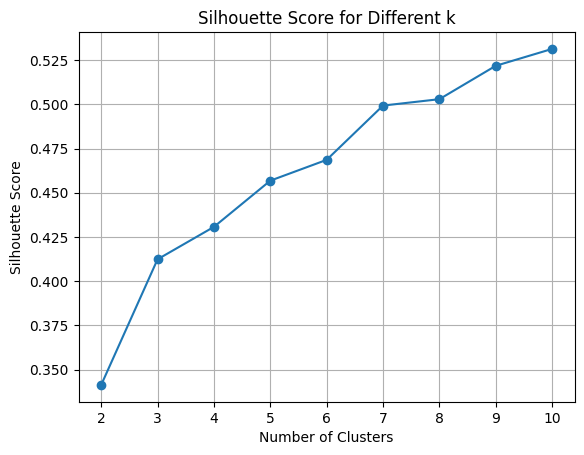

The optimal number of clusters (k) based on the Silhouette Score is: 10


In [7]:
# Plot the silhouette scores
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)
plt.show()

# Output the best k (which gives the highest silhouette score)
best_k = k_range[np.argmax(sil_scores)]
print(f"The optimal number of clusters (k) based on the Silhouette Score is: {best_k}")

In [8]:
# Step 2: Apply K-Means clustering
n_clusters = 10  # You can change the number of clusters as per your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

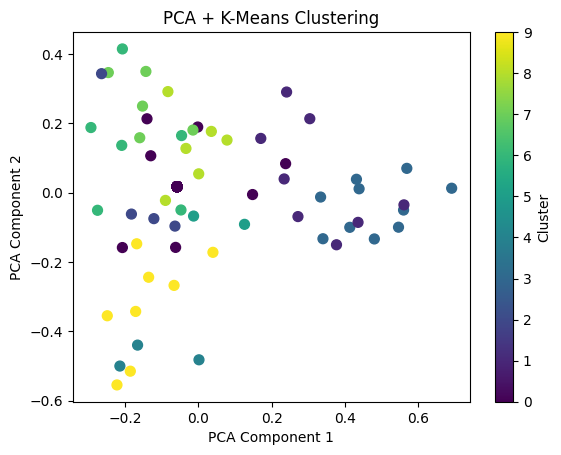

Cluster Centers (in reduced space):
[[-5.40091337e-02  1.95011771e-02  8.86497416e-02  5.24245341e-02
  -4.80455909e-02  2.44119560e-02  4.36011465e-03 -1.16926583e-02
   5.20869833e-03 -7.72859685e-03]
 [ 3.24060731e-01  4.47166736e-02 -1.05254589e-01 -1.22559109e-01
   4.13594007e-02  1.59742577e-01  1.29523621e-01 -1.64882439e-01
  -4.48923385e-02  2.77608720e-02]
 [-1.57767461e-01  2.73064238e-02 -1.61305942e-01 -1.32322400e-01
   1.52581034e-01  2.17342462e-01 -2.35988781e-02  2.35807519e-01
   1.72206227e-01 -4.24680717e-04]
 [ 4.79854030e-01 -3.97834649e-02 -5.69836570e-02  9.64164531e-02
  -7.09845236e-03 -1.37434731e-01 -7.83080459e-02  1.26241607e-01
   5.13166823e-02 -2.76678491e-02]
 [-1.25895327e-01 -4.73929325e-01 -2.30949738e-01  1.60987742e-01
   1.15526713e-01  9.54652355e-03  1.59209914e-01  9.15677876e-02
  -2.30139728e-01 -8.20415082e-02]
 [ 5.64719700e-02 -7.95640460e-02  5.34746258e-02 -3.65069181e-01
  -4.26047030e-02  2.85271007e-01 -4.01755993e-01  1.47769646e-

In [9]:
# Step 3: (Optional) Visualize the results if you'd like
# You can visualize the clustering result using the first two PCA components
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('PCA + K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# To print the cluster centers and labels:
print("Cluster Centers (in reduced space):")
print(kmeans.cluster_centers_)

print("Labels for each data point:")
print(clusters)

In [11]:
# Step 4: Create a DataFrame with author names and their assigned clusters
import pandas as pd
author_cluster_df = pd.DataFrame({
    'Author': author_names,
    'Cluster': clusters
})

# Sort by cluster for better readability
author_cluster_df = author_cluster_df.sort_values(by='Cluster')

# Print the results
print(author_cluster_df)

# Optional: Save the result to a new CSV file
author_cluster_df.to_csv('author_clusters.csv', index=False)

                  Author  Cluster
0            Mo Abdallah        0
90           Cindy Smith        0
50         Andrew C. Lee        0
91         J. Cole Smith        0
48            Lihong Lao        0
..                   ...      ...
62      Joao Paulo Marum        9
64   Kristopher Micinski        9
113         Junzhe Zhang        9
24          Ehat Ercanli        9
70           Susan Older        9

[116 rows x 2 columns]


In [12]:
import pandas as pd
import json
import os

In [19]:


# Paths
csv_path = "author_clusters.csv"  # Replace with actual CSV file path
json_folder = "faculty_scholarly/"  # Folder containing JSON files

# Load CSV file
df = pd.read_csv(csv_path)

# Function to format author names into JSON filenames
def format_filename(author_name):
    return author_name.lower().replace(" ", "_") + ".json"

# Function to extract interests from a JSON file
def get_interests(author_name):
    json_file = os.path.join(json_folder, format_filename(author_name))
    if os.path.exists(json_file):
        with open(json_file, "r", encoding="utf-8") as f:
            data = json.load(f)
            return ", ".join(data.get("interests", []))  # Convert list to a comma-separated string
    return ""

# Add interests column
df["interests"] = df["Author"].apply(get_interests)

# Save updated CSV
df.to_csv("updated_authors.csv", index=False)
print("CSV file updated successfully!")


CSV file updated successfully!
